## Introduction to CNN and computer vision

computer vision is the practice of writing algos whic can discover patterns in visual data.
eg. a camera of a self-driving car recognizes the car infront.

#Getting the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-08-26 19:59:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   127MB/s    in 0.8s    

2022-08-26 19:59:41 (127 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data 

a very crucial step at the beginning of any ML project. 
visualize as much as u can of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os 

#walk through directory and list number of files

for dirpath, dirnames, filenames, in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories, {len(filenames)} images in {dirpath}.")

there are 2 directories, 0 images in pizza_steak.
there are 2 directories, 0 images in pizza_steak/test.
there are 0 directories, 250 images in pizza_steak/test/steak.
there are 0 directories, 250 images in pizza_steak/test/pizza.
there are 2 directories, 0 images in pizza_steak/train.
there are 0 directories, 750 images in pizza_steak/train/steak.
there are 0 directories, 750 images in pizza_steak/train/pizza.


In [ ]:
## another way to find out number of images 

num = len(os.listdir("pizza_steak/train/steak"))
num

750

To visualize our images lets get class names programmatically

In [ ]:
#get classnames 
import pathlib 
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
##lets visualize images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random

def view_random_image(target_dir, target_class):

  #setup target dir
  target_folder = target_dir + target_class


  #get random img path 
  random_img = random.sample(os.listdir(target_folder), 1)


  # read the img and plot
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape= {img.shape}")

  return img

Image shape= (512, 512, 3)


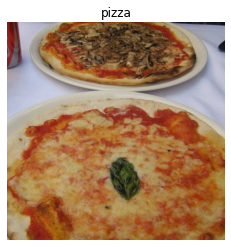

In [ ]:
#view random img
img = view_random_image("pizza_steak/train/",
                        "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[136,  27,  24],
        [138,  30,  27],
        [135,  30,  26],
        ...,
        [ 15,  13,  16],
        [ 16,  14,  17],
        [ 16,  14,  17]],

       [[136,  27,  24],
        [138,  30,  27],
        [135,  30,  26],
        ...,
        [ 16,  14,  15],
        [ 17,  15,  16],
        [ 17,  15,  16]],

       [[136,  27,  24],
        [138,  30,  27],
        [135,  30,  26],
        ...,
        [ 14,  15,  10],
        [ 14,  15,  10],
        [ 15,  16,  11]],

       ...,

       [[175, 167, 120],
        [177, 166, 120],
        [175, 162, 117],
        ...,
        [155, 125,  71],
        [152, 125,  72],
        [151, 123,  73]],

       [[178, 170, 123],
        [179, 168, 122],
        [175, 162, 117],
        ...,
        [149, 119,  65],
        [150, 120,  68],
        [148, 120,  70]],

       [[181, 175, 127],
        [180, 172, 125],
        [173, 160, 115],
        ...,
        [149, 119,  6

In [ ]:
img.shape

(512, 512, 3)

# and end-to-end example

lets build a cnn to find patterns in our images:

* load images
* preprocess images
* build a cnn to find patterns
* compile
* fit to training data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


#set random seed
tf.random.set_seed(42)


# preprocess data, get all pixel values between 0&1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# setup path to our data directries
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


#import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)



# Build a CNN model 

model1= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])




#compile
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam())

#fit
history1 = model1.fit(train_data, epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 217ms/step - loss: 0.5521 - accuracy: 0.7040 - val_loss: 0.3700 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 11s 246ms/step - loss: 0.4105 - accuracy: 0.8193 - val_loss: 0.3598 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3971 - accuracy: 0.8207 - val_loss: 0.3222 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3764 - accuracy: 0.8347 - val_loss: 0.3100 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3213 - accuracy: 0.8693 - val_loss: 0.3010 - val_accuracy: 0.8760


training model using GPU accelerator runtime💀


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# using same model as. before

lets replicate a model we built before

In [ ]:
tf.random.set_seed(42)

model2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

history2 = model2.fit(train_data, epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.7276 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# improving model2

tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model3.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

history3 = model3.fit(train_data, epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Epoch 1/10
47/47 [==============================] - 9s 190ms/step - loss: 2.1565 - accuracy: 0.6560 - val_loss: 1.1331 - val_accuracy: 0.6120
Epoch 2/10
47/47 [==============================] - 9s 183ms/step - loss: 1.5669 - accuracy: 0.6620 - val_loss: 1.0558 - val_accuracy: 0.7540
Epoch 3/10
47/47 [==============================] - 9s 182ms/step - loss: 0.6823 - accuracy: 0.7540 - val_loss: 0.7363 - val_accuracy: 0.6960
Epoch 4/10
47/47 [==============================] - 9s 183ms/step - loss: 0.5766 - accuracy: 0.7507 - val_loss: 0.7617 - val_accuracy: 0.7080
Epoch 5/10
47/47 [==============================] - 9s 182ms/step - loss: 0.5162 - accuracy: 0.7713 - val_loss: 0.5616 - val_accuracy: 0.7420
Epoch 6/10
47/47 [==============================] - 9s 183ms/step - loss: 0.3846 - accuracy: 0.8320 - val_loss: 0.4576 - val_accuracy: 0.7900
Epoch 7/10
47/47 [==============================] - 10s 221ms/step - loss: 0.4973 - accuracy: 0.7927 - val_loss: 0.5827 - val_accuracy: 0.7580
Epoch

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#Binary classification 

* visualize
* preprocess
* create a baseline model
* fit
* evaluate 
* improve by adjusting different params

Image shape= (512, 512, 3)
Image shape= (512, 512, 3)


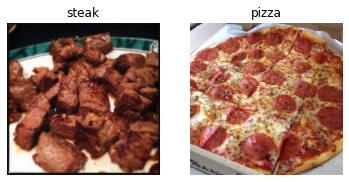

In [ ]:
#visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


In [ ]:
## preprocess the data 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Turn the data into batches

 a batch is a small subset of data
 rather than look at them all images, model might lok at 32 at a time 
prevents the model to crash.
trying to learn the pattern in 100000 images might overfit the model


In [ ]:
# create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
## Load img data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, #target directories of img
                                               target_size=(224,224), # target size of images
                                               class_mode="binary", # type of data we're working with
                                               batch_size=32) #target size. of minibatches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of a training dataset
images, labels= train_data.next() # get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#get the 1st two images
images[:2], images[0].shape

(array([[[[0.6313726 , 0.4666667 , 0.30980393],
          [0.62352943, 0.45882356, 0.3019608 ],
          [0.627451  , 0.46274513, 0.29803923],
          ...,
          [0.14509805, 0.10980393, 0.0509804 ],
          [0.14509805, 0.10980393, 0.0509804 ],
          [0.14901961, 0.10196079, 0.03921569]],
 
         [[0.6509804 , 0.48627454, 0.32941177],
          [0.6392157 , 0.47450984, 0.31764707],
          [0.63529414, 0.47058827, 0.30588236],
          ...,
          [0.1764706 , 0.12941177, 0.06666667],
          [0.1764706 , 0.12941177, 0.06666667],
          [0.1764706 , 0.12941177, 0.06666667]],
 
         [[0.65882355, 0.49411768, 0.3372549 ],
          [0.65882355, 0.49411768, 0.3372549 ],
          [0.65882355, 0.49411768, 0.32941177],
          ...,
          [0.17254902, 0.12156864, 0.05490196],
          [0.19215688, 0.12941177, 0.06666667],
          [0.21176472, 0.14901961, 0.08627451]],
 
         ...,
 
         [[0.09019608, 0.07450981, 0.03921569],
          [0.07450

In [ ]:
#view the first batch of labels
labels

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.],
      dtype=float32)

#Create a CNN baseline

a baseline model (a simple model or existing result that you setup when beginning a ML experiment and then you keep experimenting, u try to beat the baseline)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


🔑 In Deep Learning, there is almost infinite amt of architectures one can use, so start with something simple, and the add complexity accordingly as per need.

In [ ]:
##Baseline

model4= Sequential([
    Conv2D(filters=10,        #number of sliding windows going across an input(higher= more complex model)
           kernel_size=3,       #size on sliding window going across an input
           strides=1,           #size of the step sliding window takes across an input
           padding="valid",       #"same"= output.shape is equal to input.shape, "valid"=output.shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),        #input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")        #output layer (working with binary classification so only 1 neuron)
])





model4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])





In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data)

47

In [ ]:
history4 = model4.fit(train_data,       #combination of labels and sample data
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 210ms/step - loss: 1.1916 - accuracy: 0.6787 - val_loss: 0.4766 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4412 - accuracy: 0.7993 - val_loss: 0.4163 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3316 - accuracy: 0.8793 - val_loss: 0.4058 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.1956 - accuracy: 0.9307 - val_loss: 0.4512 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.0740 - accuracy: 0.9813 - val_loss: 0.5691 - val_accuracy: 0.7800


In [ ]:
#Evaluate 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pd.DataFrame(history4.history).plot(figsize=(10,7))

NameError: ignored

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate Loss Curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(loss))

  #plot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  #plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
plot_loss_curves(history4)

NameError: ignored

when a model's **validation loss starts increasing**, its likely that the model is **overfitting** the training dataset.
this means the patterns too well, thus the model's ability to generalize unseen data is diminished.

## Adjust the model parameters

fitting a ML model comes in three steps:
1. create a baseline
2. beat the baseline by overfitting a larger model
3. reduce overfitting


ways to induce overfitting:
* increase the number of conv layers
* increase the number of conv filters 
* add another dense layer to the output of our flattened layer



reduce overfitting:
* add data augmentation
* add regularization layers(such as MaxPool2D)
* add more data...

In [ ]:
model5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [ ]:
history5 = model5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.5833 - accuracy: 0.7033 - val_loss: 0.4733 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4907 - accuracy: 0.7787 - val_loss: 0.3821 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4376 - accuracy: 0.8073 - val_loss: 0.3955 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4043 - accuracy: 0.8267 - val_loss: 0.3351 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3815 - accuracy: 0.8320 - val_loss: 0.3387 - val_accuracy: 0.8400


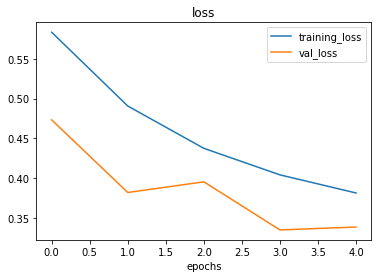

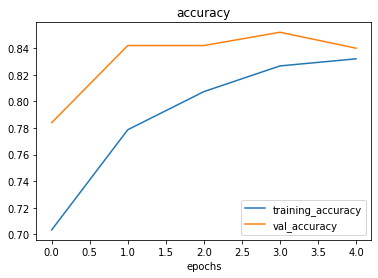

In [ ]:
plot_loss_curves(history5)

In [ ]:
model5.summary(
    
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Reducing overfitting is also known as Regularization.

#Data Augmentation!

In [ ]:
#create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,    #how much do u want to rotate an image
                                             shear_range=0.2,       #how much do you want to shear an img
                                             zoom_range=0.2,        #zoom in randomly
                                             width_shift_range=0.2, #move img around x-axis
                                             height_shift_range=0.3,#move img around y-axis
                                             horizontal_flip=True)  #Flip an image

#create img data generator without augmentation
train_datagen =ImageDataGenerator(rescale=1/255.)

#create test datagen
test_datagen= ImageDataGenerator(rescale=1/255.)






**Data augmentation** is the process of altering our training data leading it to more diversity and in turn allowing our models to learn more generalizable patterns.
altering might mean adjusting the rotation of an img, flipping, cropping or smthng similar.

In [ ]:
#visualizing data augmentation
#import data and augment it from training directory 

print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   target_size=(224, 224),
                                                                   shuffle=False)

#create non augmented train data batches
print("Non Augmented training data:")
train_data= train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

#create non augmented test data batches
print("non augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             )


Augmented training data:
Found 1500 images belonging to 2 classes.
Non Augmented training data:
Found 1500 images belonging to 2 classes.
non augmented test data:
Found 500 images belonging to 2 classes.


Data augmentation is usually only performed on training data. 
Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
#Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

In [ ]:
import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
print(f"image number:{random_number}")
plt.title("Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

IndexError: ignored

#Creating a model on augmented data

In [ ]:
model6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

history6 = model6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 497ms/step - loss: 0.7034 - accuracy: 0.4107 - val_loss: 0.6896 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 23s 498ms/step - loss: 0.7169 - accuracy: 0.4907 - val_loss: 0.6884 - val_accuracy: 0.5700
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.7026 - accuracy: 0.4953 - val_loss: 0.6859 - val_accuracy: 0.5480
Epoch 4/5
47/47 [==============================] - 23s 479ms/step - loss: 0.6922 - accuracy: 0.5267 - val_loss: 0.6835 - val_accuracy: 0.5260
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6930 - accuracy: 0.5180 - val_loss: 0.6826 - val_accuracy: 0.7180


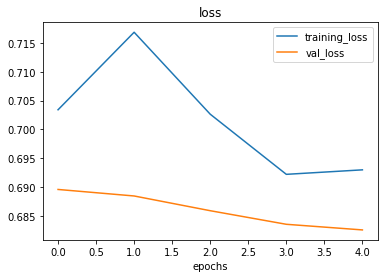

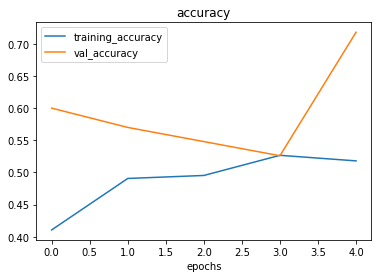

In [ ]:
plot_loss_curves(history6)

Lets shuffle our augmented training data and train another model on it.😵‍💫

In [ ]:
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

history7 = model7.fit(train_data_augmented_shuffle,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffle),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 468ms/step - loss: 0.6614 - accuracy: 0.6020 - val_loss: 0.5892 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 23s 496ms/step - loss: 0.5694 - accuracy: 0.7013 - val_loss: 0.4329 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5212 - accuracy: 0.7407 - val_loss: 0.3576 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.4869 - accuracy: 0.7760 - val_loss: 0.3533 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5067 - accuracy: 0.7640 - val_loss: 0.3920 - val_accuracy: 0.8180


In [ ]:
len(test_data)

16

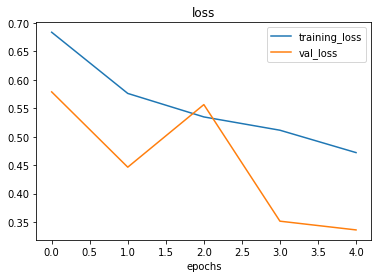

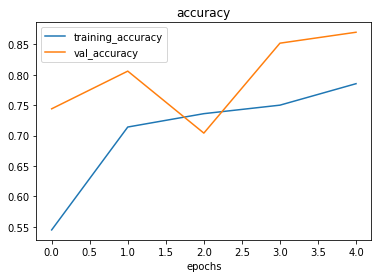

In [ ]:
plot_loss_curves(history7)

When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(here, pizza & steak at the same time instead of just pizza then steak).

Since we have already beaten our baseline, lets improve our model using:

* increase the number of model layers(eg: add more Conv2D/MaxPool2D layers.
* increase the number of filters in each convolutional layer (from 10 to 32/64)
* train for longer 
* find ideal LR
* get more data 
* **Transfer Learning**

##Making a prediction with our trained model on custom data 

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

--2022-08-25 18:15:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-08-25 18:15:49 (188 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



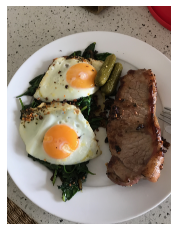

In [ ]:
##View example 
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);



In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
tf.constant(steak)

<tf.Tensor: shape=(4032, 3024, 3), dtype=uint8, numpy=
array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 

When you train a neural network and make a prediction using your custom data, its important that your data is preprocessed into the same format as the data your model has trained on.

In [ ]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 10)    280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 10)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0

In [ ]:
# model7.predict(steak)
# model7.predict(tf.expand_dims(steak, axis=0))

#create a function to import an image and resize it to be able to used with our model
def load_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """

  img= tf.io.read_file(filename)
  #decode into tensor
  img = tf.image.decode_image(img)

  img = tf.image.resize(img, size=[img_shape, img_shape])

  #Rescale the image and get all values b/w 0&1
  img= img/225.
  return img

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
steak= load_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [ ]:
pred = model7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.5673867]], dtype=float32)

visualizing the predicted output

In [ ]:
##

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

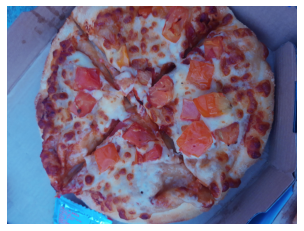

In [ ]:

pizza_img = mpimg.imread("pizza_img.jpg")
plt.imshow(pizza_img)
plt.axis(False);


In [ ]:
pizza_img.shape

(3000, 4000, 3)

In [ ]:
pizza_img

array([[[ 22, 145, 212],
        [ 22, 145, 212],
        [ 22, 145, 212],
        ...,
        [ 26,  67, 129],
        [ 23,  64, 126],
        [ 19,  63, 124]],

       [[ 24, 146, 211],
        [ 25, 147, 212],
        [ 25, 147, 212],
        ...,
        [ 31,  72, 134],
        [ 29,  70, 132],
        [ 26,  70, 131]],

       [[ 22, 144, 209],
        [ 25, 147, 212],
        [ 27, 149, 214],
        ...,
        [ 29,  70, 132],
        [ 28,  69, 131],
        [ 24,  68, 129]],

       ...,

       [[ 25,  75, 144],
        [ 19,  69, 138],
        [ 21,  71, 140],
        ...,
        [117, 122, 154],
        [113, 118, 150],
        [110, 115, 147]],

       [[ 27,  77, 146],
        [ 17,  67, 136],
        [ 16,  66, 135],
        ...,
        [116, 121, 153],
        [114, 119, 151],
        [113, 118, 150]],

       [[ 27,  77, 148],
        [ 16,  66, 137],
        [ 14,  64, 135],
        ...,
        [114, 119, 151],
        [120, 125, 157],
        [125, 130, 162]]

In [ ]:
pizz_img= load_image("pizza_img.jpg")

In [ ]:
pizz_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.12778911, 0.65223354, 0.936678  ],
        [0.15253967, 0.6325397 , 0.92142856],
        [0.1485601 , 0.6929819 , 0.9559524 ],
        ...,
        [0.31944415, 0.39499968, 0.63499963],
        [0.22524999, 0.34796062, 0.6167698 ],
        [0.11400504, 0.29178283, 0.5673384 ]],

       [[0.16100907, 0.59577096, 0.8961678 ],
        [0.13376416, 0.5596371 , 0.8618593 ],
        [0.15312944, 0.6519163 , 0.93963736],
        ...,
        [0.35919455, 0.4169723 , 0.65252787],
        [0.3209633 , 0.38763   , 0.63207436],
        [0.12553065, 0.29886398, 0.5610862 ]],

       [[0.21879813, 0.61879814, 0.8943537 ],
        [0.14976192, 0.5542063 , 0.86531746],
        [0.16256271, 0.60256267, 0.9003178 ],
        ...,
        [0.36042044, 0.4181982 , 0.6537538 ],
        [0.38382152, 0.44159928, 0.67271036],
        [0.21165015, 0.32360122, 0.5965373 ]],

       ...,

       [[0.28261995, 0.55363935, 0.8070185 ],
        [0.35

In [ ]:
pred = model7.predict(tf.expand_dims(pizz_img, axis=0))
pred

array([[0.04613875]], dtype=float32)

In [ ]:
class_names[int(tf.round(pred))]

'pizza'

Model is predicting correctly tbh

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediction with model and plots the image with predicted class as the title.
  """
  #Import target image and preprocess it 
  img = load_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

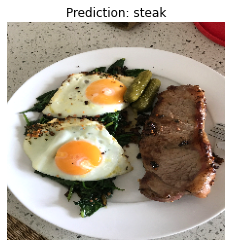

In [ ]:
#test our model with custom image
pred_and_plot(model7, "03-steak.jpeg")

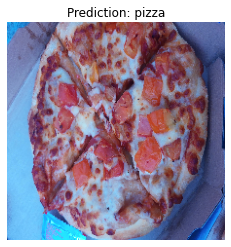

In [ ]:
pred_and_plot(model7, "pizza_img.jpg")

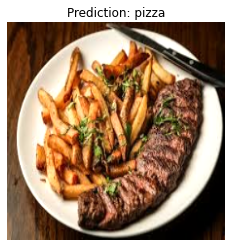

In [ ]:
pred_and_plot(model7, "steak_img.jpeg")

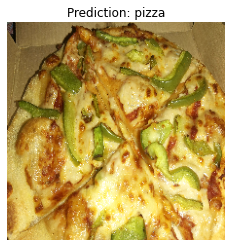

In [ ]:
pred_and_plot(model7, "pizza2.jpg")

##Multi class Classification

We've just been through a bunch of following steps with a binary classification problem, now we're going to step things up a notch with 10 classes of food (multiclass)

1. become one with the data
2. preprocess the data and get it ready for the model 
3. create a baseline model
4. fit the model(overfit it to make sure it works)
5. evaluate the model
6. adjust different hyperparams and improvise to beat the baseline/reduce overfitting
7. repeat until satisfied

#1.Import And become one with the data:

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-08-26 20:10:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.103.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   269MB/s    in 1.8s    

2022-08-26 20:10:06 (269 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os 

#walk through the data 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 10 directori

In [ ]:
#Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"



In [ ]:
#class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape= (307, 512, 3)


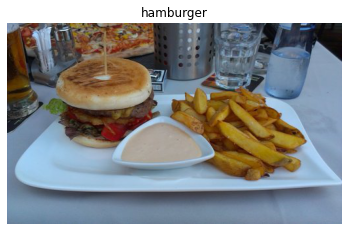

In [ ]:
#data visualization

import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

#2.Preprocess the data and prepare it for the model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#3.Create a baseline model 
Lets replicate CNN explainer model with 10 classes multiclass model

In [ ]:
model8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax")
])


model8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=Adam(),
               metrics=["accuracy"])



#4.Fit the model

In [ ]:
history8 = model8.fit(train_data, epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 61s 202ms/step - loss: 2.1533 - accuracy: 0.2119 - val_loss: 1.9808 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 53s 224ms/step - loss: 1.8891 - accuracy: 0.3436 - val_loss: 1.8618 - val_accuracy: 0.3516
Epoch 3/5
235/235 [==============================] - 52s 219ms/step - loss: 1.5767 - accuracy: 0.4644 - val_loss: 1.8669 - val_accuracy: 0.3632
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 1.0629 - accuracy: 0.6465 - val_loss: 2.3259 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 48s 204ms/step - loss: 0.4802 - accuracy: 0.8505 - val_loss: 3.1794 - val_accuracy: 0.3048


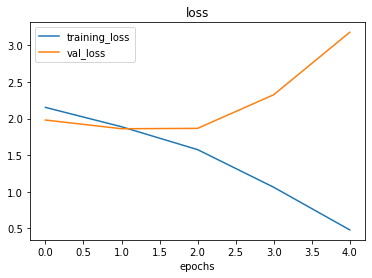

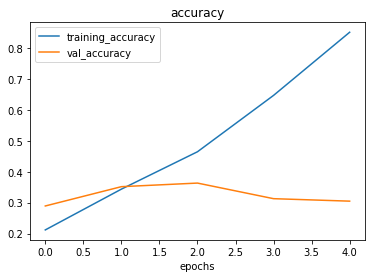

In [ ]:
plot_loss_curves(history8)

Model is **Overfitting**😵‍💫


In [ ]:
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

#5.Evaluate the model

In [ ]:
model8.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 3.1794 - accuracy: 0.3048


[3.1793975830078125, 0.30480000376701355]

#6.Adjust The model hyperparameters (to reduce overfitting/ beat baseline)

As per our model's performance on training data, it is clear that model is learning something, but it is not generalizing well on unseen/test data (it ia overfitting)

Overfitting can be fixed by various steps, some are following:
* **Get more Data**- Having more data gives the model more opportunities to learn diverse patterns.
* **Simplify the model**- If the model is overfitting, it may be too complicated of a model, try reducing some layers or hidden units in a layer.
* **Use data augmentation**- data augmentation manipulates the training data in such a way to add more diversity to it, without altering the original data.
* **Transfer Learning**- transfer learning leverages the patterns another model has learned on similar data to your own and allows ypu to use those patterns to use on your custom datasets.

In [ ]:
#Simplifying our Model8
#lets remove 2 convolution layers

model9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10),
    Activation(activation="softmax")
])


model9.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=Adam()
)



In [ ]:
model9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
history9 = model9.fit(train_data, epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 54s 224ms/step - loss: 2.1471 - accuracy: 0.2325 - val_loss: 1.9918 - val_accuracy: 0.2908
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.8346 - accuracy: 0.3704 - val_loss: 1.8744 - val_accuracy: 0.3540
Epoch 3/5
235/235 [==============================] - 45s 191ms/step - loss: 1.5072 - accuracy: 0.5000 - val_loss: 1.9136 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 1.0429 - accuracy: 0.6701 - val_loss: 2.2045 - val_accuracy: 0.3124
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.5805 - accuracy: 0.8304 - val_loss: 2.6289 - val_accuracy: 0.2956


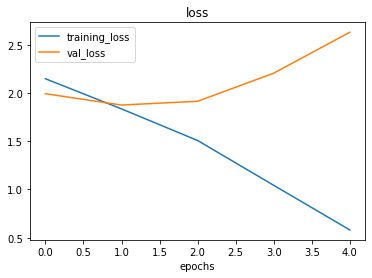

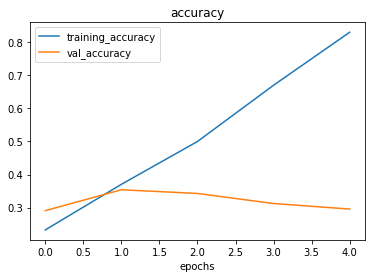

In [ ]:
plot_loss_curves(history9)

#Trying to reduce overfitting using DataAugmentation

In [ ]:
#create an augmented data generator 

train_augmented = ImageDataGenerator(rescale=1/225.,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

train_data_augmented = train_augmented.flow_from_directory(train_dir,
                                                           target_size=(224,224),
                                                           batch_size=32,
                                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# model10= Sequential([
#     Conv2D(10, 3, activation="relu"),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(),
#     Conv2D(10, 3, activation="relu"),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(),
# ])

model10 = tf.keras.models.clone_model(model8)

model10.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [ ]:
history10 = model10.fit(train_data_augmented, epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 115s 483ms/step - loss: 2.3043 - accuracy: 0.0949 - val_loss: 2.3026 - val_accuracy: 0.1052
Epoch 2/5
235/235 [==============================] - 112s 476ms/step - loss: 2.3048 - accuracy: 0.1039 - val_loss: 2.3024 - val_accuracy: 0.1016
Epoch 3/5
235/235 [==============================] - 112s 477ms/step - loss: 2.2963 - accuracy: 0.1175 - val_loss: 2.2650 - val_accuracy: 0.1524
Epoch 4/5
235/235 [==============================] - 113s 479ms/step - loss: 2.2626 - accuracy: 0.1572 - val_loss: 2.2060 - val_accuracy: 0.1924
Epoch 5/5
235/235 [==============================] - 111s 474ms/step - loss: 2.2347 - accuracy: 0.1771 - val_loss: 2.1610 - val_accuracy: 0.2072


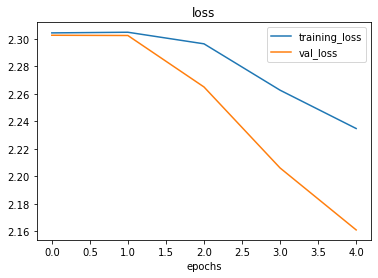

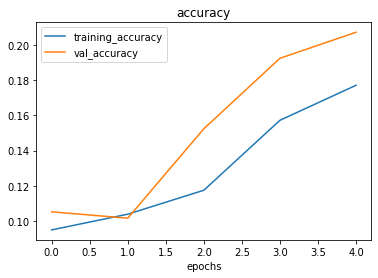

In [ ]:
plot_loss_curves(history10)

In [ ]:
model8.evaluate(test_data)

79/79 [==============================] - 15s 194ms/step - loss: 3.1794 - accuracy: 0.3048


[3.1793975830078125, 0.30480000376701355]

In [ ]:
model10.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 2.1610 - accuracy: 0.2072


[2.1609833240509033, 0.20720000565052032]

Loss curves are much better than the baseline model, heading towards the right direction.
We might see some improvements if we train for a bit longer.

#7.Repeat 

we can keep going... continually to briing our curves together and improve accuracy.

By running lots of experiments:
- restructuring our model architecture(increase layers/hidden units)
- adjust LR
- tweaking augmentation hyperparams in ImageDataGenerator
- Training for longer(maybe not😵‍💫)
- **Transfer Learning**🙃

##Making predictions

In [ ]:
#reconfig pred_and_plot for multiclass
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediction with model and plots the image with predicted class as the title.
  """
  #Import target image and preprocess it 
  img = load_image(filename)


  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))


  #add logic for multiclass 
  if len(pred[0]) > 1:
    pred_class= class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]



  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

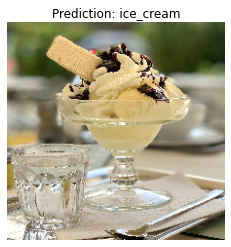

In [ ]:
pred_and_plot(model10, "ice.jpg", class_names=class_names)

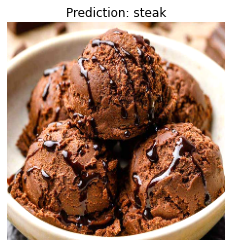

In [ ]:
pred_and_plot(model10, "chocolate.jpg", class_names=class_names)

God Level Gameplay🤡


In [ ]:
#Saving and loading our model 

#save
model10.save("saved_model10")

In [ ]:
#load
loaded_model10 = tf.keras.models.load_model("saved_model10")
loaded_model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

Adios